In [1]:
import requests

url_1 = 'https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip'
fileName_1= 'rps.zip'
    
url_2 = 'https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip'
fileName_2 = 'rps-test-set.zip'


response = requests.get(url_1)
with open(fileName_1, 'wb') as f:
    f.write(response.content)
    
response = requests.get(url_2)
with open(fileName_2, 'wb') as f:
    f.write(response.content)

In [2]:
import zipfile

local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./rps-test')
zip_ref.close()

In [5]:
import os 

base_dir = './rps-train/rps/'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print(rock_dir)
print(paper_dir)
print(scissors_dir)

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])


./rps-train/rps/rock
./rps-train/rps/paper
./rps-train/rps/scissors
total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-059.png', 'rock01-108.png', 'rock04-065.png', 'rock05ck01-067.png', 'rock05ck01-073.png', 'rock04-071.png', 'rock05ck01-098.png', 'rock02-008.png', 'rock07-k03-013.png', 'rock02-034.png']
['paper03-088.png', 'paper05-026.png', 'paper05-032.png', 'paper03-077.png', 'paper03-063.png', 'paper02-099.png', 'paper04-037.png', 'paper04-023.png', 'paper02-066.png', 'paper02-072.png']
['testscissors03-040.png', 'testscissors03-054.png', 'testscissors03-068.png', 'testscissors03-083.png', 'testscissors03-097.png', 'scissors03-113.png', 'scissors03-107.png', 'testscissors02-051.png', 'testscissors02-045.png', 'scissors01-002.png']


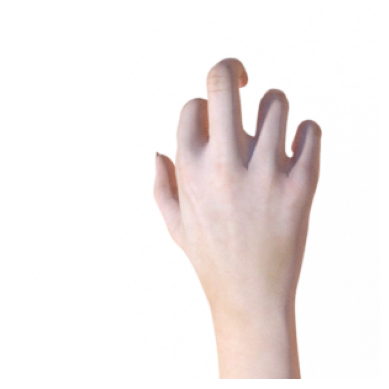

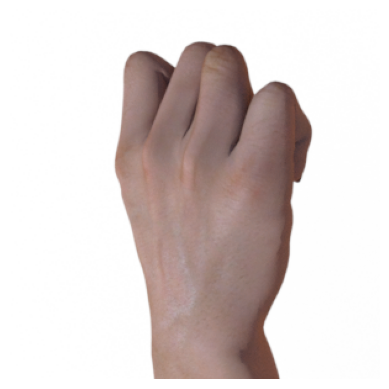

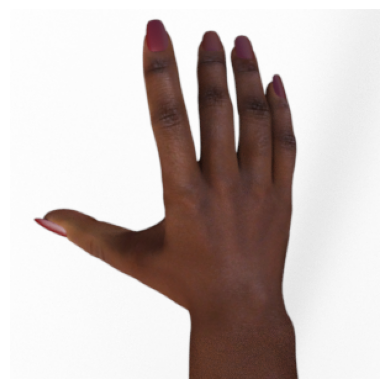

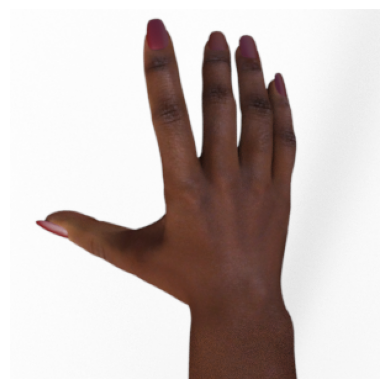

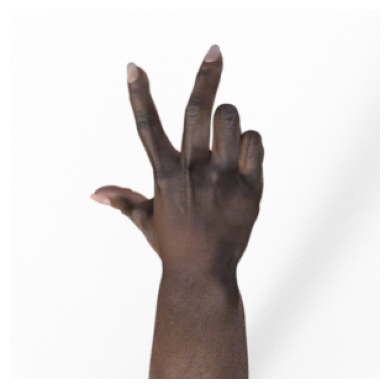

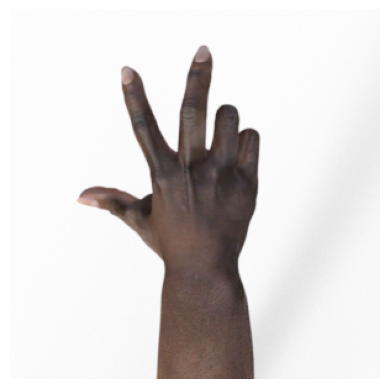

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 3

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [8]:
import tensorflow as tf


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

/Users/geonheekim/Desktop/study/python/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:

model.compile(
    loss = 'categorical_crossentropy',
    optimizer= 'rmsprop',
    metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

train_generator = train_datagen.flow_from_directory(
    'rps-train/rps',
    target_size=(150,150),
    batch_size=126,
    class_mode = 'categorical'  
)

validation_generator = test_datagen.flow_from_directory(
    'rps-test/rps-test-set/',
    target_size=(150,150),
    batch_size=126,
    class_mode='categorical',
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [16]:
history = model.fit(train_generator,
                    steps_per_epoch=20,
                    validation_data=validation_generator,
                    epochs=25,
                    validation_steps=3,
                    verbose=2)

Epoch 1/25


/Users/geonheekim/Desktop/study/python/venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 - 32s - 2s/step - accuracy: 0.3329 - loss: 1.2385 - val_accuracy: 0.3333 - val_loss: 1.0944
Epoch 2/25
20/20 - 0s - 684us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/25


2024-04-15 15:54:31.660775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/geonheekim/miniforge3/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-15 15:54:31.665551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 31s - 2s/step - accuracy: 0.3702 - loss: 1.0918 - val_accuracy: 0.4919 - val_loss: 1.0666
Epoch 4/25
20/20 - 0s - 338us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/25


2024-04-15 15:55:02.736220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 15:55:02.738650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 31s - 2s/step - accuracy: 0.3825 - loss: 1.0905 - val_accuracy: 0.4946 - val_loss: 0.9405
Epoch 6/25
20/20 - 0s - 363us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/25


2024-04-15 15:55:34.168618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 15:55:34.171359: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 31s - 2s/step - accuracy: 0.4857 - loss: 1.0112 - val_accuracy: 0.6263 - val_loss: 0.7287
Epoch 8/25
20/20 - 0s - 345us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/25


2024-04-15 15:56:05.002796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 15:56:05.005441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 31s - 2s/step - accuracy: 0.5187 - loss: 0.9939 - val_accuracy: 0.6237 - val_loss: 0.6850
Epoch 10/25
20/20 - 0s - 345us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/25


2024-04-15 15:56:35.830781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 15:56:35.833069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 31s - 2s/step - accuracy: 0.6075 - loss: 0.8426 - val_accuracy: 0.7876 - val_loss: 0.5990
Epoch 12/25
20/20 - 0s - 379us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/25


2024-04-15 15:57:06.860914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 15:57:06.863185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 31s - 2s/step - accuracy: 0.6956 - loss: 0.7079 - val_accuracy: 0.8495 - val_loss: 0.3669
Epoch 14/25
20/20 - 0s - 343us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/25


2024-04-15 15:57:38.230658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 15:57:38.233115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 32s - 2s/step - accuracy: 0.7115 - loss: 0.6752 - val_accuracy: 0.9570 - val_loss: 0.2267
Epoch 16/25
20/20 - 0s - 408us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/25


2024-04-15 15:58:09.850033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 15:58:09.853513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 31s - 2s/step - accuracy: 0.7956 - loss: 0.4897 - val_accuracy: 0.9382 - val_loss: 0.1742
Epoch 18/25
20/20 - 0s - 529us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/25


2024-04-15 15:58:40.876988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 15:58:40.880644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 31s - 2s/step - accuracy: 0.8214 - loss: 0.4548 - val_accuracy: 0.9597 - val_loss: 0.1368
Epoch 20/25
20/20 - 0s - 330us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/25


2024-04-15 15:59:12.380963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 15:59:12.383425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 33s - 2s/step - accuracy: 0.8607 - loss: 0.3520 - val_accuracy: 0.9113 - val_loss: 0.2565
Epoch 22/25
20/20 - 0s - 349us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 23/25


2024-04-15 15:59:45.269774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 15:59:45.272052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 32s - 2s/step - accuracy: 0.8433 - loss: 0.3742 - val_accuracy: 0.9543 - val_loss: 0.1312
Epoch 24/25
20/20 - 0s - 499us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 25/25


2024-04-15 16:00:17.704974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-15 16:00:17.708221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 - 32s - 2s/step - accuracy: 0.8806 - loss: 0.3121 - val_accuracy: 0.9839 - val_loss: 0.0610


In [20]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

file1 = 'rps-test/rps-test-set/paper/testpaper01-01.png'
file2 = 'rps-test/rps-test-set/rock/testrock01-07.png'
file3 = 'rps-test/rps-test-set/scissors/testscissors01-17.png'

for file in [file1, file2, file3]:
    img = load_img(file, target_size=(150,150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(file)
    print(classes)
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
rps-test/rps-test-set/paper/testpaper01-01.png
[[1.0000000e+00 0.0000000e+00 3.4677002e-16]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
rps-test/rps-test-set/rock/testrock01-07.png
[[0. 1. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
rps-test/rps-test-set/scissors/testscissors01-17.png
[[0. 0. 1.]]
